<a href="https://colab.research.google.com/github/olifviazhry/projectportofolio/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# loading the csv data to a Pandas DataFrame
data_house = pd.read_csv('/content/train.csv')

In [ ]:
house = pd.DataFrame(data_house)

house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

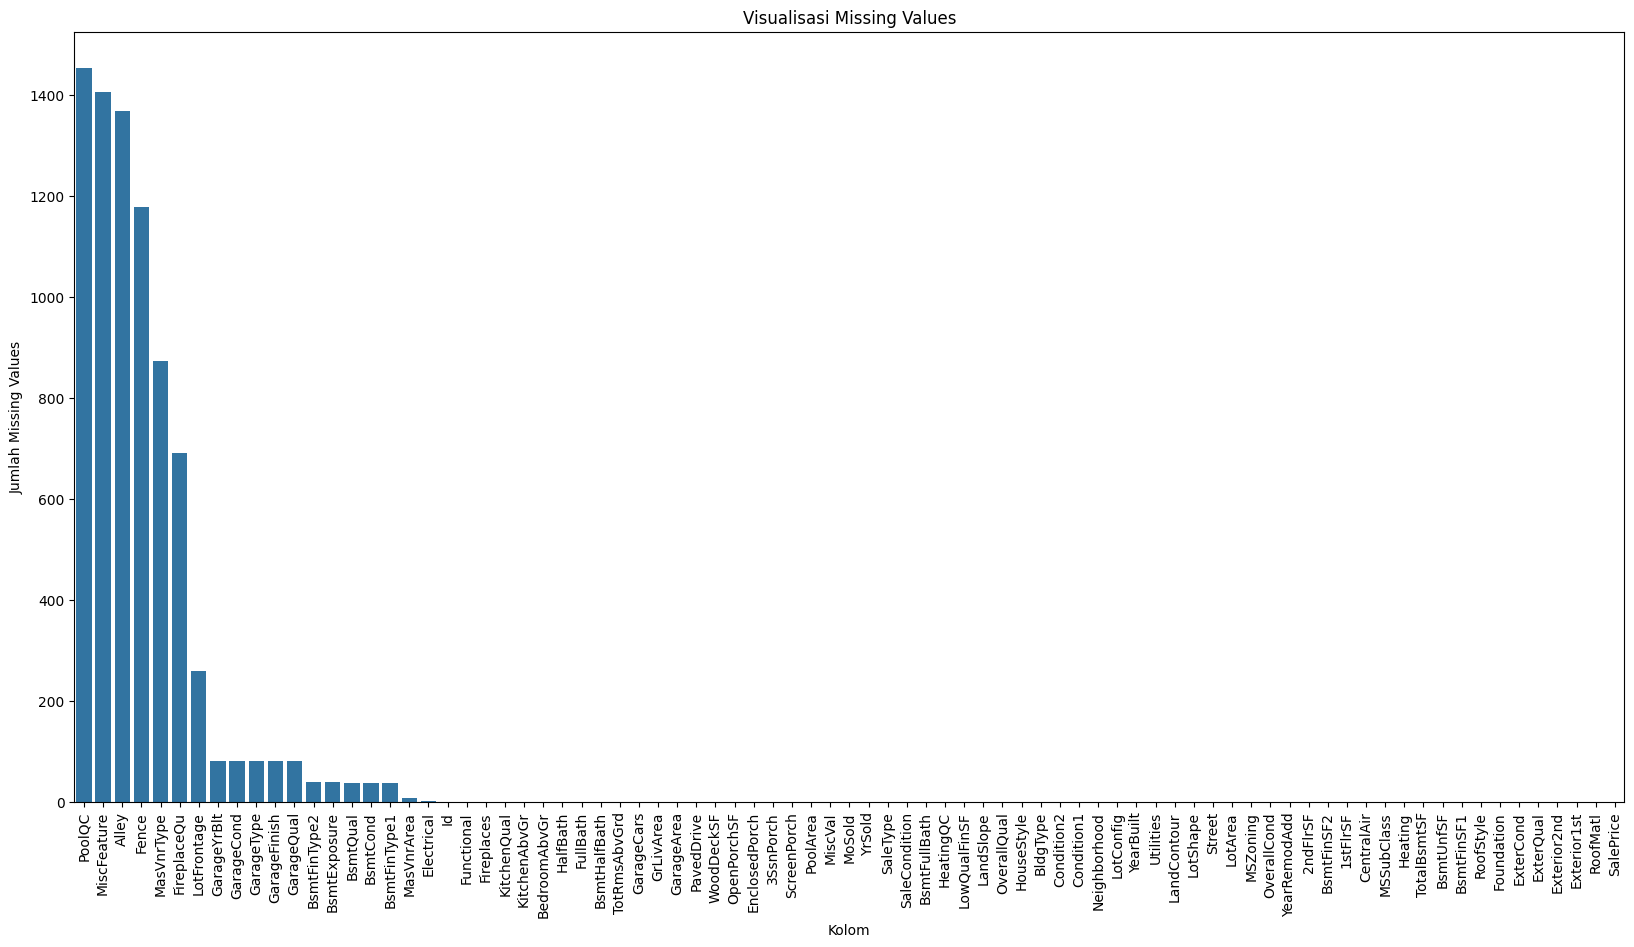

In [ ]:
# Menghitung jumlah missing values per kolom
missing_values = house.isnull().sum().sort_values(ascending=False)

# Membuat bar plot untuk visualisasi
plt.figure(figsize=(20, 10))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Kolom')
plt.ylabel('Jumlah Missing Values')
plt.title('Visualisasi Missing Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols =  house.select_dtypes(include=['object'])
categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    house[col] = label_encoder.fit_transform(house[col])

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
!pip install scikit-learn # install scikit-learn if it's not installed

import pandas as pd # import pandas
from sklearn.impute import SimpleImputer # import SimpleImputer class from sklearn.impute


In [ ]:
imputer = SimpleImputer(strategy='mean')

house_imputed = pd.DataFrame(imputer.fit_transform(house), columns=house.columns)

house_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0


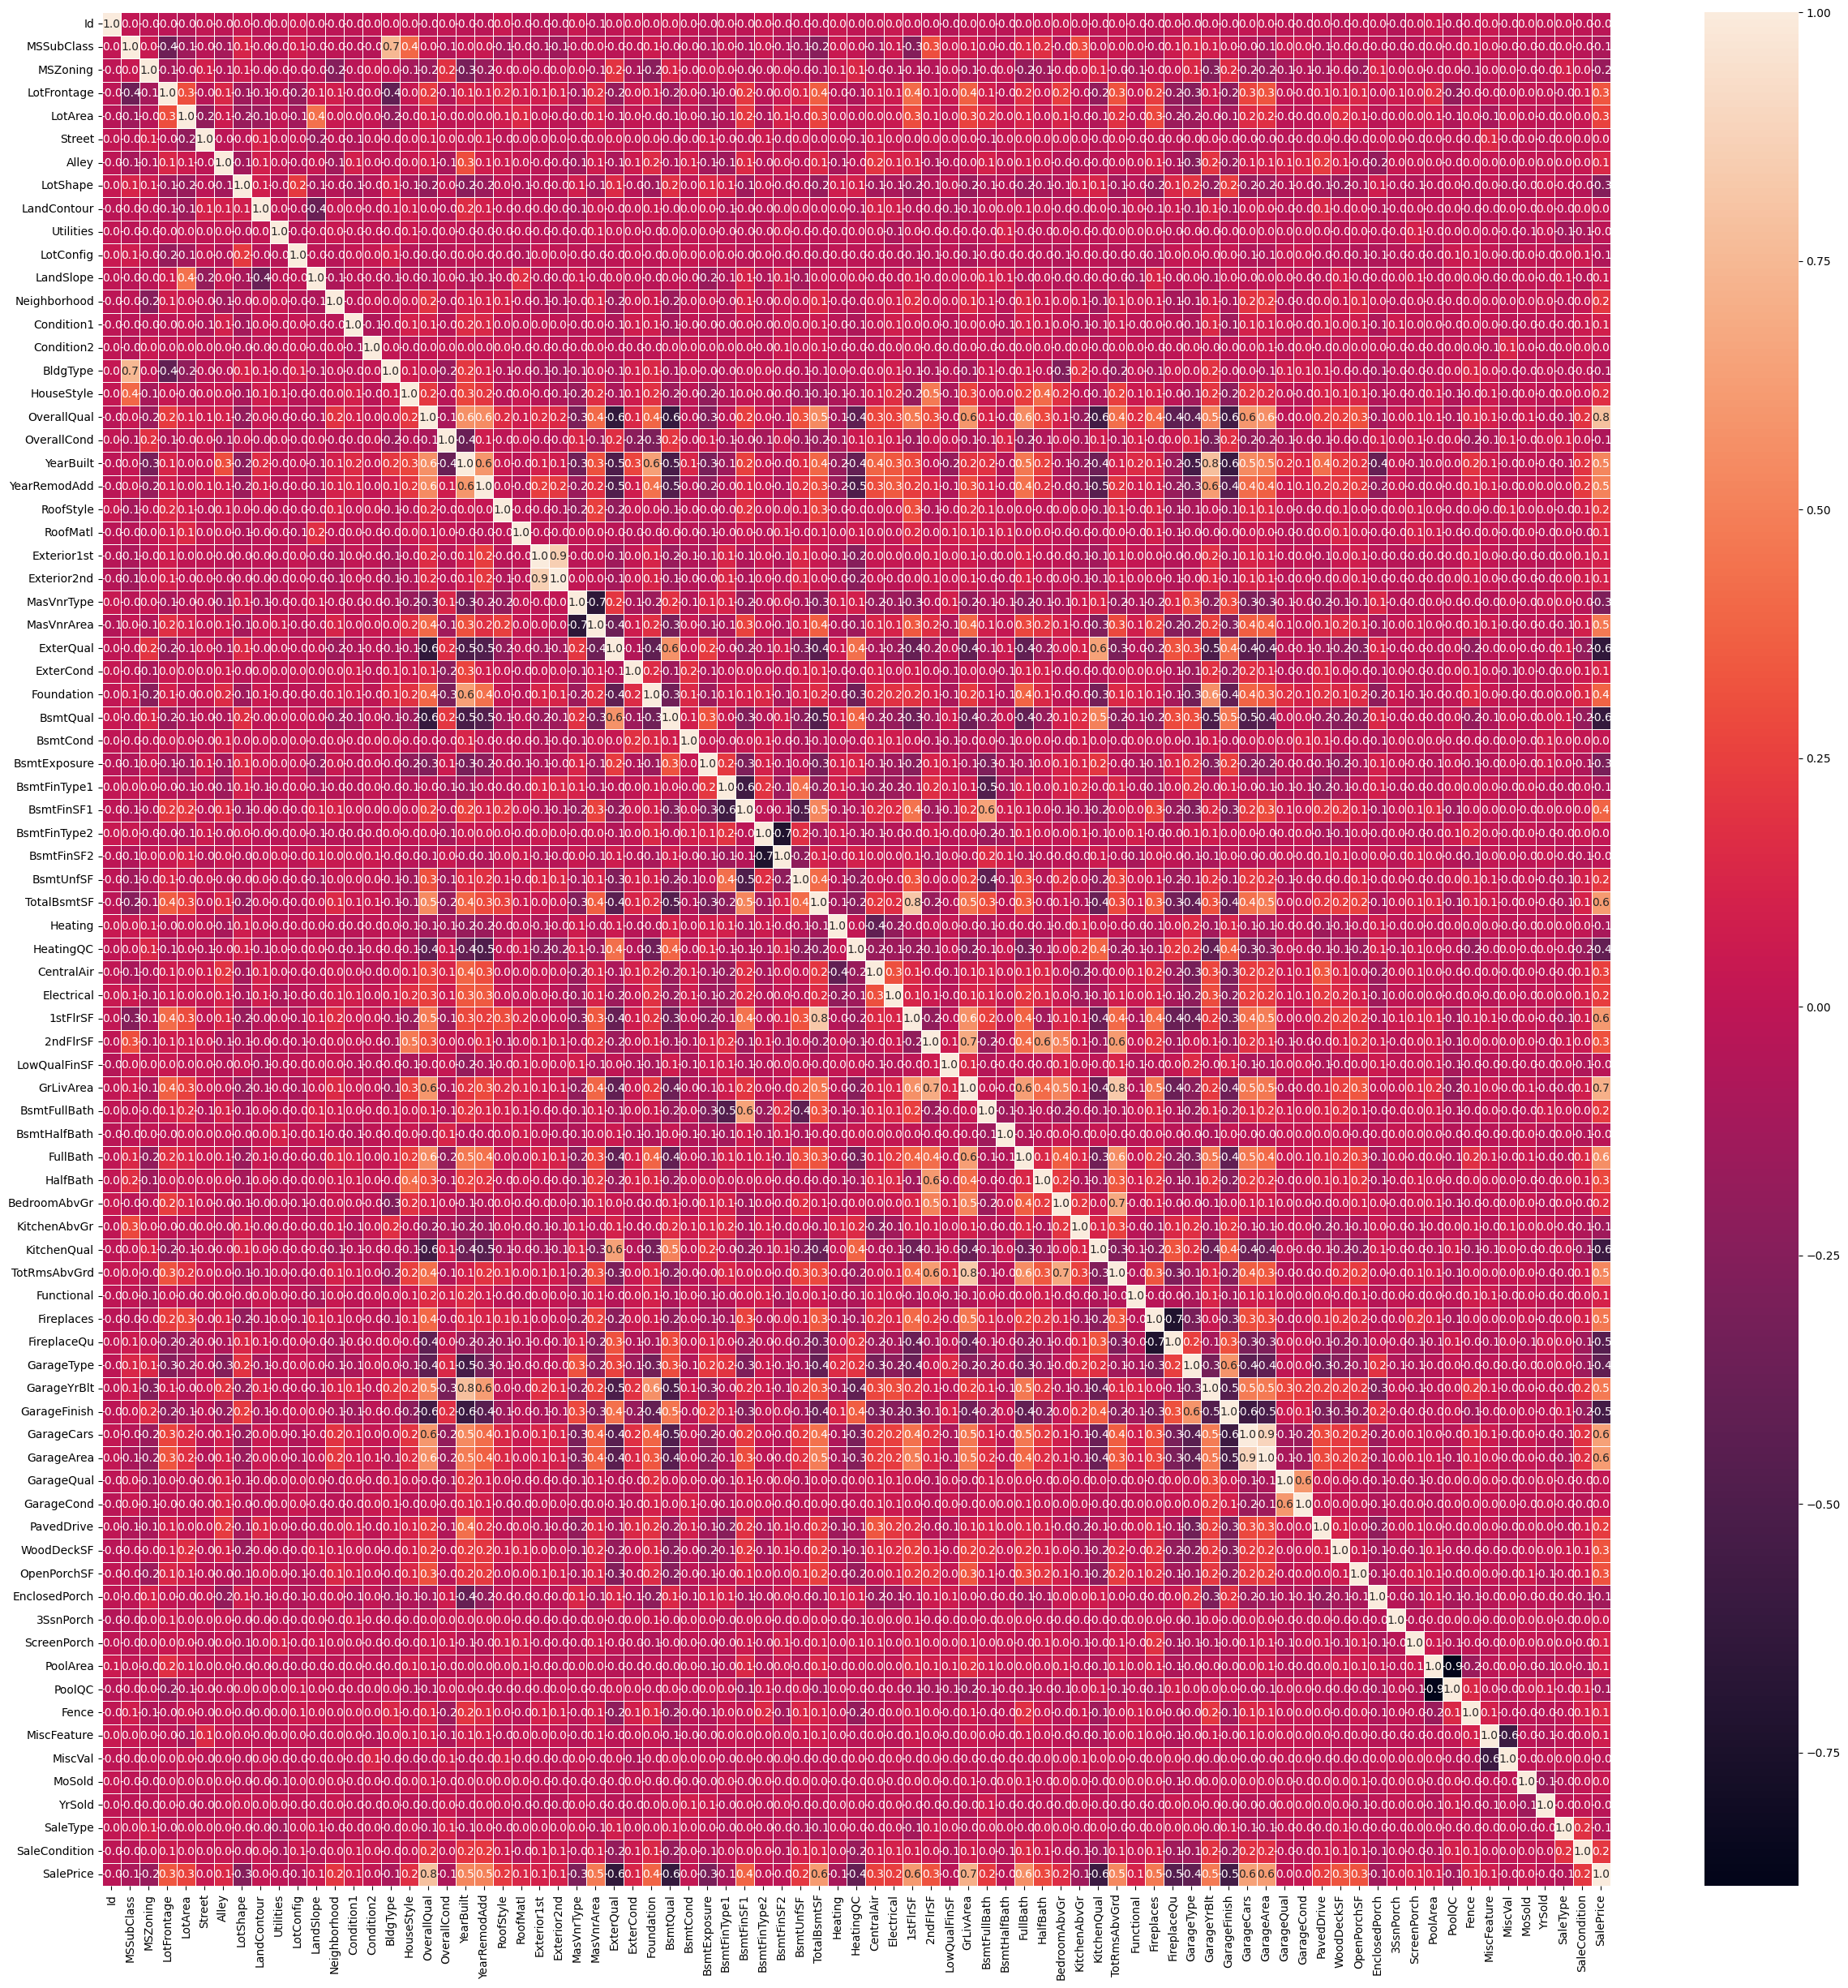

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap
# create a figure and an axes object. Store the axes object in a variable named ax.
fig, ax = plt.subplots(figsize=(30, 30))
# pass the ax object to the heatmap
sns.heatmap(house_imputed.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

In [ ]:
corr = house_imputed.corrwith(house_imputed['SalePrice'], method='pearson')
golden_features = corr[abs(corr) > 0.4].sort_values(ascending=False)
golden_features = golden_features.drop('SalePrice')
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features), golden_features))

There is 20 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
HeatingQC      -0.400178
GarageType     -0.415283
FireplaceQu    -0.459605
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
dtype: float64


In [ ]:
corr_spearman = house_imputed.corrwith(house_imputed['SalePrice'], method='kendall')
golden_features_sp = corr[abs(corr) > 0.4].sort_values(ascending=False)
golden_features_sp = golden_features_sp.drop('SalePrice')
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_sp), golden_features_sp))

There is 20 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
HeatingQC      -0.400178
GarageType     -0.415283
FireplaceQu    -0.459605
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
dtype: float64


In [ ]:
korelasi = house_imputed.corr()
print(korelasi)

                     Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172   -0.013585 -0.031496     0.010158  0.001205   
YrSold         0.000712   -0.021407 -0.020628     0.006768 -0.014261   
SaleType       0.019773    0.012464  0.097437    -0.030846  0.012292   
SaleCondition -0.005806   -0.024940  0.009494     0.058464  0.034169   
SalePrice     -0.021917   -0.084284 -0.166872     0.334901  0.263843   

                 Street     Alley  LotShape  LandContour     Utilities  ...  \
Id             0.008916 -0.001530  0.032122    -0.019659

In [ ]:
X = house_imputed.drop(columns='SalePrice', axis=1)
Y = house_imputed['SalePrice']

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Tentukan jumlah fold (misalnya 5-fold)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
rmse_scores = []

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #Use iloc to select rows based on the indices.
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
  # Latih model
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Buat prediksi
y_pred = rf.predict(X_test)

# Hitung RMSE
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 1546972784.6369863
RMSE: 39331.574906644484
MAE: 24656.527397260274
R-squared: 0.7983172106568992


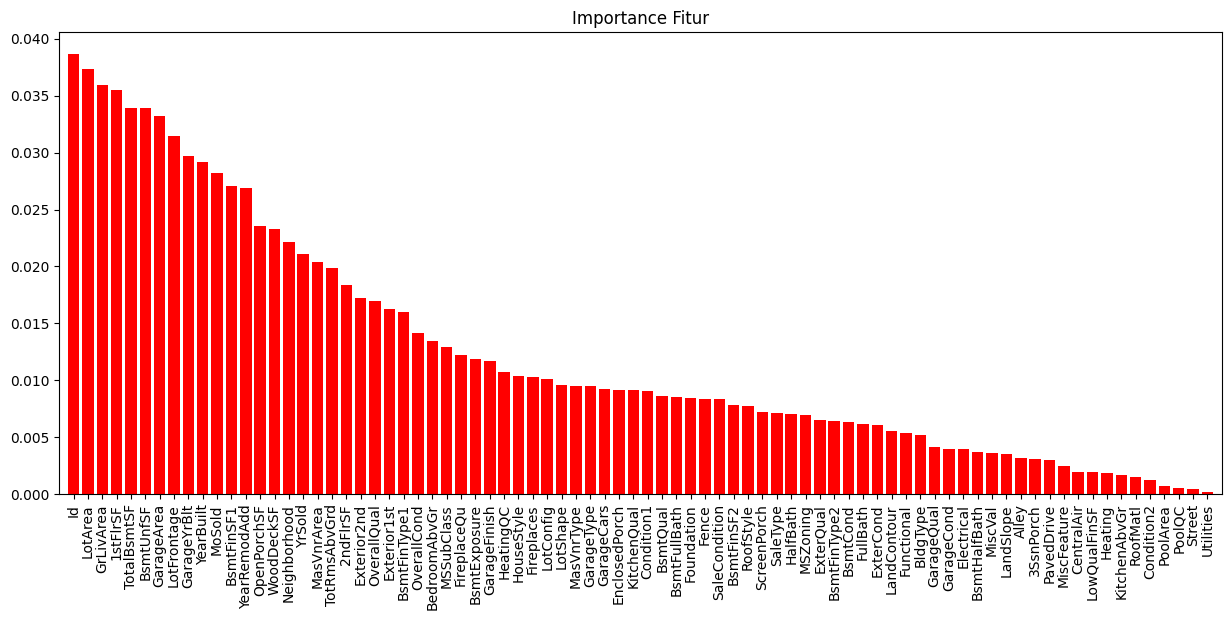

In [ ]:
rf = RandomForestClassifier()
rf.fit(X, Y)

# Mendapatkan importance setiap fitur
importances = rf.feature_importances_

# Mengurutkan fitur berdasarkan importance
indices = np.argsort(importances)[::-1]

# Membuat plot untuk visualisasi
plt.figure(figsize=(15,6))
plt.title("Importance Fitur")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) # Use X.columns for feature names
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Membuat DataFrame untuk memudahkan melihat hasil
importances = pd.DataFrame({'feature_rf': X.columns, 'importance_rf': rf.feature_importances_})
importances = importances.sort_values('importance_rf', ascending=False)

print(importances.head(10).to_string(index=False))

 feature_rf  importance_rf
         Id       0.038649
    LotArea       0.037379
  GrLivArea       0.035980
   1stFlrSF       0.035461
TotalBsmtSF       0.033959
  BsmtUnfSF       0.033887
 GarageArea       0.033241
LotFrontage       0.031451
GarageYrBlt       0.029710
  YearBuilt       0.029203


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()

# Latih model
model.fit(X_train, Y_train)


# Buat prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model menggunakan RMSE
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)


print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 713377093.9914993
RMSE: 26709.120052736656
MAE: 17212.54518942637
R-squared: 0.9069952079322178


In [ ]:
# Mendapatkan importance dari setiap fitur
importance = pd.DataFrame({'feature': model.feature_names_in_, 'importance': model.feature_importances_})

# Urutkan berdasarkan importance
importance = importance.sort_values('importance', ascending=False)

# Tampilkan 10 fitur terpenting
print(importance.head(10))

         feature  importance
17   OverallQual    0.521838
46     GrLivArea    0.049448
61    GarageCars    0.046376
41    CentralAir    0.045281
49      FullBath    0.044083
52  KitchenAbvGr    0.043081
30      BsmtQual    0.025997
60  GarageFinish    0.021421
53   KitchenQual    0.015805
38   TotalBsmtSF    0.015173


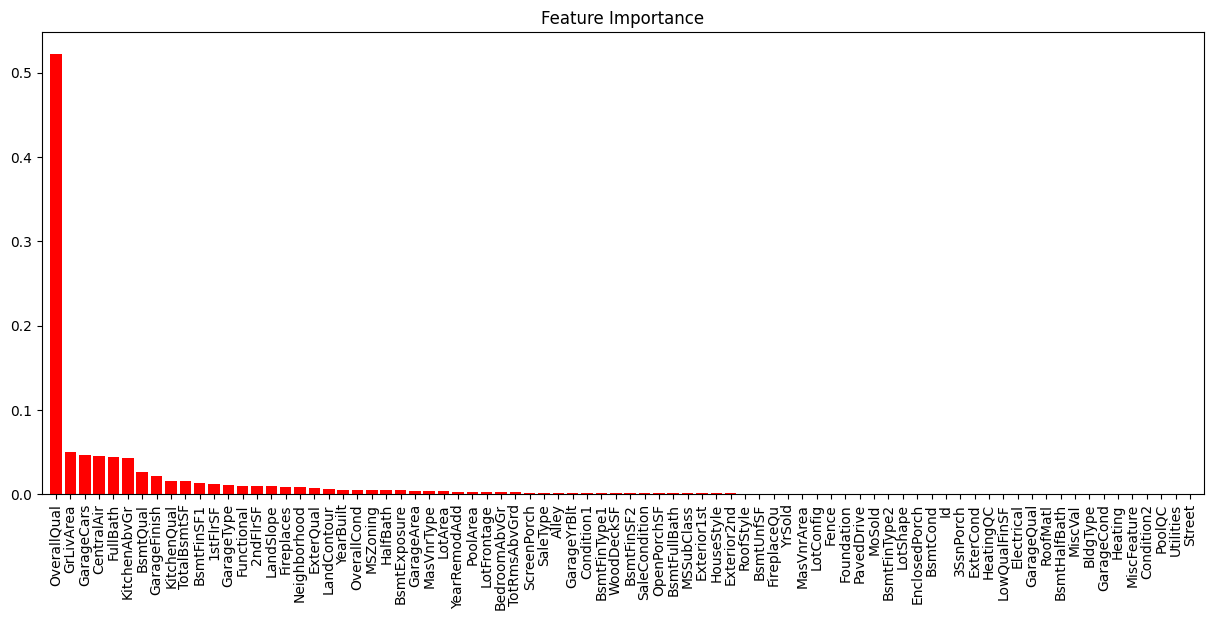

In [ ]:
# Plot fitur penting
plt.figure(figsize=(15,6))
plt.bar(range(X.shape[1]), importance['importance'], color="r", align="center")
plt.xticks(range(X.shape[1]), importance['feature'], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.title('Feature Importance')
plt.show()

DATA TEST

In [ ]:
# loading the csv data to a Pandas DataFrame
data_housetest = pd.read_csv('/content/test.csv')

In [ ]:
test_house = pd.DataFrame(data_housetest)

test_house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


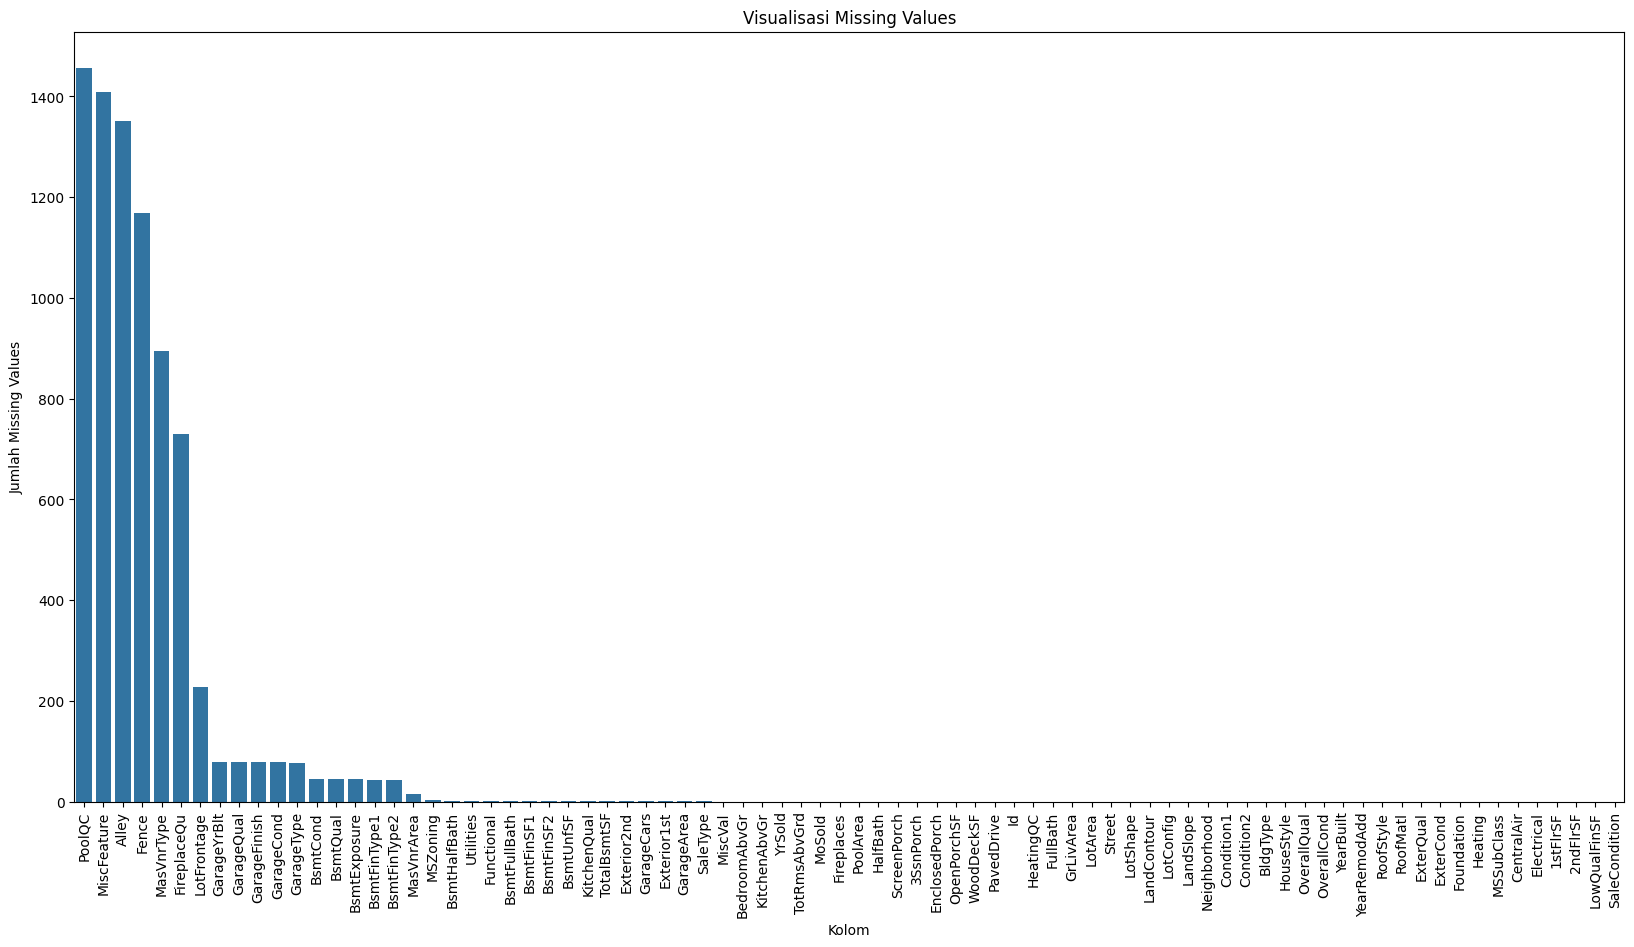

In [ ]:
# Menghitung jumlah missing values per kolom
missing_values = test_house.isnull().sum().sort_values(ascending=False)

# Membuat bar plot untuk visualisasi
plt.figure(figsize=(20, 10))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Kolom')
plt.ylabel('Jumlah Missing Values')
plt.title('Visualisasi Missing Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
categorical_cols =  test_house.select_dtypes(include=['object'])

label_encoder = LabelEncoder()

for col in categorical_cols:
    test_house[col] = label_encoder.fit_transform(test_house[col])

In [ ]:
imputer = SimpleImputer(strategy='mean')

test_house_imputed = pd.DataFrame(imputer.fit_transform(test_house), columns=test_house.columns)

In [ ]:
test_house_imputed.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,2.0,80.000000,11622.0,1.0,2.0,3.0,3.0,0.0,...,120.0,0.0,2.0,2.0,3.0,0.0,6.0,2010.0,8.0,4.0
1,1462.0,20.0,3.0,81.000000,14267.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,0.0,12500.0,6.0,2010.0,8.0,4.0
2,1463.0,60.0,3.0,74.000000,13830.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,2.0,3.0,0.0,3.0,2010.0,8.0,4.0
3,1464.0,60.0,3.0,78.000000,9978.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,6.0,2010.0,8.0,4.0
4,1465.0,120.0,3.0,43.000000,5005.0,1.0,2.0,0.0,1.0,0.0,...,144.0,0.0,2.0,4.0,3.0,0.0,1.0,2010.0,8.0,4.0
5,1466.0,60.0,3.0,75.000000,10000.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,4.0,2010.0,8.0,4.0
6,1467.0,20.0,3.0,68.580357,7980.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,2.0,500.0,3.0,2010.0,8.0,4.0
7,1468.0,60.0,3.0,63.000000,8402.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,5.0,2010.0,8.0,4.0
8,1469.0,20.0,3.0,85.000000,10176.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,2.0,2010.0,8.0,4.0
9,1470.0,20.0,3.0,70.000000,8400.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,2.0,3.0,0.0,4.0,2010.0,8.0,4.0


In [ ]:
test_house_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   float64
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   float64
 6   Alley          1459 non-null   float64
 7   LotShape       1459 non-null   float64
 8   LandContour    1459 non-null   float64
 9   Utilities      1459 non-null   float64
 10  LotConfig      1459 non-null   float64
 11  LandSlope      1459 non-null   float64
 12  Neighborhood   1459 non-null   float64
 13  Condition1     1459 non-null   float64
 14  Condition2     1459 non-null   float64
 15  BldgType       1459 non-null   float64
 16  HouseStyle     1459 non-null   float64
 17  OverallQual    1459 non-null   float64
 18  OverallC

In [ ]:
predicted_saleprice = rf.predict(test_house_imputed)
test_house_imputed['SalePrice'] = predicted_saleprice
test_house_imputed[['Id', 'SalePrice']].to_csv('sale price.csv', index=False)

In [ ]:
# Remove the SalePrice column before prediction
predicted_saleprice = model.predict(test_house_imputed.drop('SalePrice', axis=1))
test_house_imputed['SalePrice'] = predicted_saleprice
test_house_imputed[['Id', 'SalePrice']].to_csv('sale price2.csv', index=False)

In [ ]:
predict_house = pd.read_csv('/content/sale price.csv')

predict_rf = pd.DataFrame(predict_house)
predict_rf.head(10)

,Id,SalePrice
0,1461.0,129000.0
1,1462.0,151500.0
2,1463.0,175000.0
3,1464.0,189000.0
4,1465.0,185000.0


In [ ]:
predict_house2 = pd.read_csv('/content/sale price2.csv')
predict_xgb = pd.DataFrame(predict_house2)
predict_xgb.head()

,Id,SalePrice
0,1461.0,122698.43
1,1462.0,163750.06
2,1463.0,180913.89
3,1464.0,196844.28
4,1465.0,184853.73


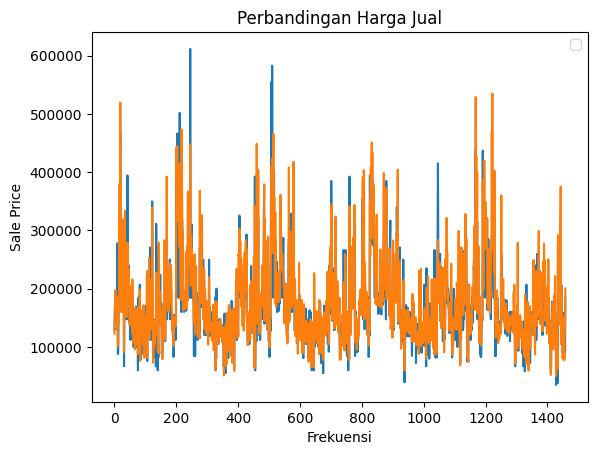

In [ ]:
plt.plot(predict_house['SalePrice'])
plt.plot(predict_house2['SalePrice'])
plt.xlabel('Frekuensi')
plt.ylabel('Sale Price')
plt.title('Perbandingan Harga Jual')
plt.legend()
plt.show()

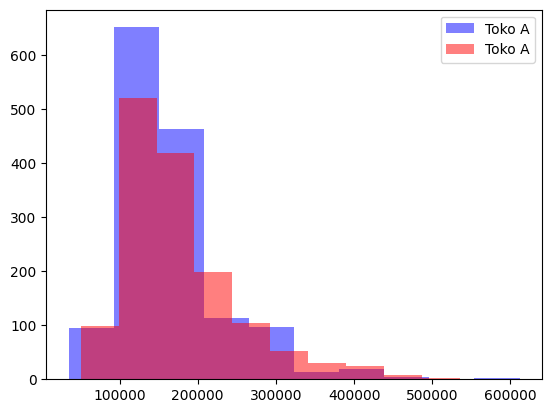

In [ ]:
plt.hist(predict_rf['SalePrice'], bins=10, color='blue', alpha=0.5, label='Random Forest')
plt.hist(predict_xgb['SalePrice'], bins=10, color='red', alpha=0.5, label='XGBoost')
plt.legend()
plt.show()

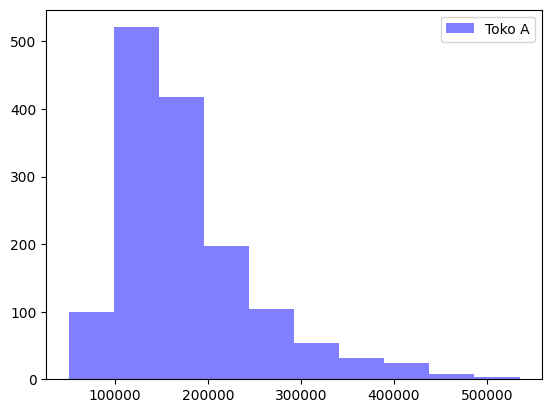

In [ ]:
plt.hist(predict_house2['SalePrice'], bins=10, color='blue', alpha=0.5, label='Toko A')
plt.legend()
plt.show()